## Object Detection with YOLOv5

#### Clone the YOLOV5 from official repo

In [1]:
# !git clone https://github.com/ultralytics/yolov3  # clone repo
!git clone https://github.com/ultralytics/yolov5  # clone repo
# !git clone https://github.com/ultralytics/yolov7  # clone repo
# !git clone https://github.com/ultralytics/yolov8  # clone repo


Cloning into 'yolov5'...
remote: Enumerating objects: 16605, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 16605 (delta 50), reused 96 (delta 43), pack-reused 16459
Receiving objects: 100% (16605/16605), 15.27 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (11356/11356), done.


#### Install Dependencies

In [2]:
%cd yolov5
!pip install -r requirements.txt  # install dependencies

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylin

In [6]:
!pip install torchsummary

#### Load important libraries

In [45]:
import torch
from torchvision import models
from torchsummary import summary
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pillow library
from PIL import Image, ImageOps, ImageFilter
import requests
from io import BytesIO

#### Load Pre-trained YOLOv5 model

In [46]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or 'yolov5m', 'yolov5l', 'yolov5x'

# print(model)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-10 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [47]:
# summary(model,(3, 640, 640))

#### Acquisition & Preprocessing

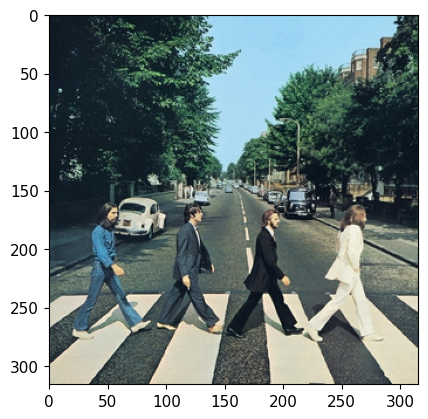

In [52]:

# Load an image
# img_path = 'https://ultralytics.com/images/zidane.jpg'  # or path to your image
img_path = 'https://upload.wikimedia.org/wikipedia/en/4/42/Beatles_-_Abbey_Road.jpg'  # or path to your image


response = requests.get(img_path)
response.raise_for_status()
img = np.asarray(Image.open(BytesIO(response.content)))

plt.imshow(img)
plt.show()

#### Perform Object Detection on Image

In [53]:
# img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform inference: Image proc, extraction ...
results = model(img)
results.print()  # print results to console

image 1/1: 316x316 5 persons, 6 cars, 1 truck, 1 handbag
Speed: 19.1ms pre-process, 509.5ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)


#### Display and Analysis

image 1/1: 316x316 5 persons, 6 cars, 1 truck, 1 handbag
Speed: 19.1ms pre-process, 509.5ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)


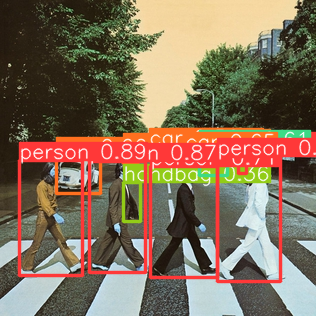

Saved 1 image to runs/detect/exp4


In [54]:
# Display results
results.print()  # print results to console
results.show()   # display results
results.save()   # save results to runs/detect

#### Perform Object Detection on Videos

In [51]:
# import cv2

# # Path to your video file
# video_path = 'path_to_your_video.mp4'  # replace with your video path

# # Load video
# cap = cv2.VideoCapture(video_path)

# # Check if video opened successfully
# if not cap.isOpened():
#     print("Error opening video stream or file")

# # Read until video is completed
# while cap.isOpened():
#     ret, frame = cap.read()
#     if ret:
#         # Perform inference on each frame
#         results = model(frame)

#         # Render results on the frame
#         results.render()

#         # Display the resulting frame
#         cv2.imshow('Frame', results.imgs[0])

#         # Press Q on keyboard to exit
#         if cv2.waitKey(25) & 0xFF == ord('q'):
#             break
#     else:
#         break

# # Release video capture object
# cap.release()

# # Close all OpenCV windows
# cv2.destroyAllWindows()
